# Problem Statement

To develop a machine learning model that can predict whether a person is eligible for loan or not provided with certain information as input.

# Steps Involved

* Importing libraries
* Loading Dataset
* Data preprocessing
* Splitting data into training and testing data
* Model Training
* Model Evaluation
* Building a prediction system

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Loading Dataset

In [2]:
dataset = pd.read_csv("LoanData.csv")

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

In [5]:
# Statistical measures of the dataset
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# number of missing values in each column
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
dataset = dataset.dropna()

In [8]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
# Label encoding
dataset.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_16284\3906585731.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace=True)


In [10]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
# Dependent Column values
dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [13]:
# Replacing the value of 3+ with 4
dataset = dataset.replace('3+', 4)

In [15]:
dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

# Data Visualization

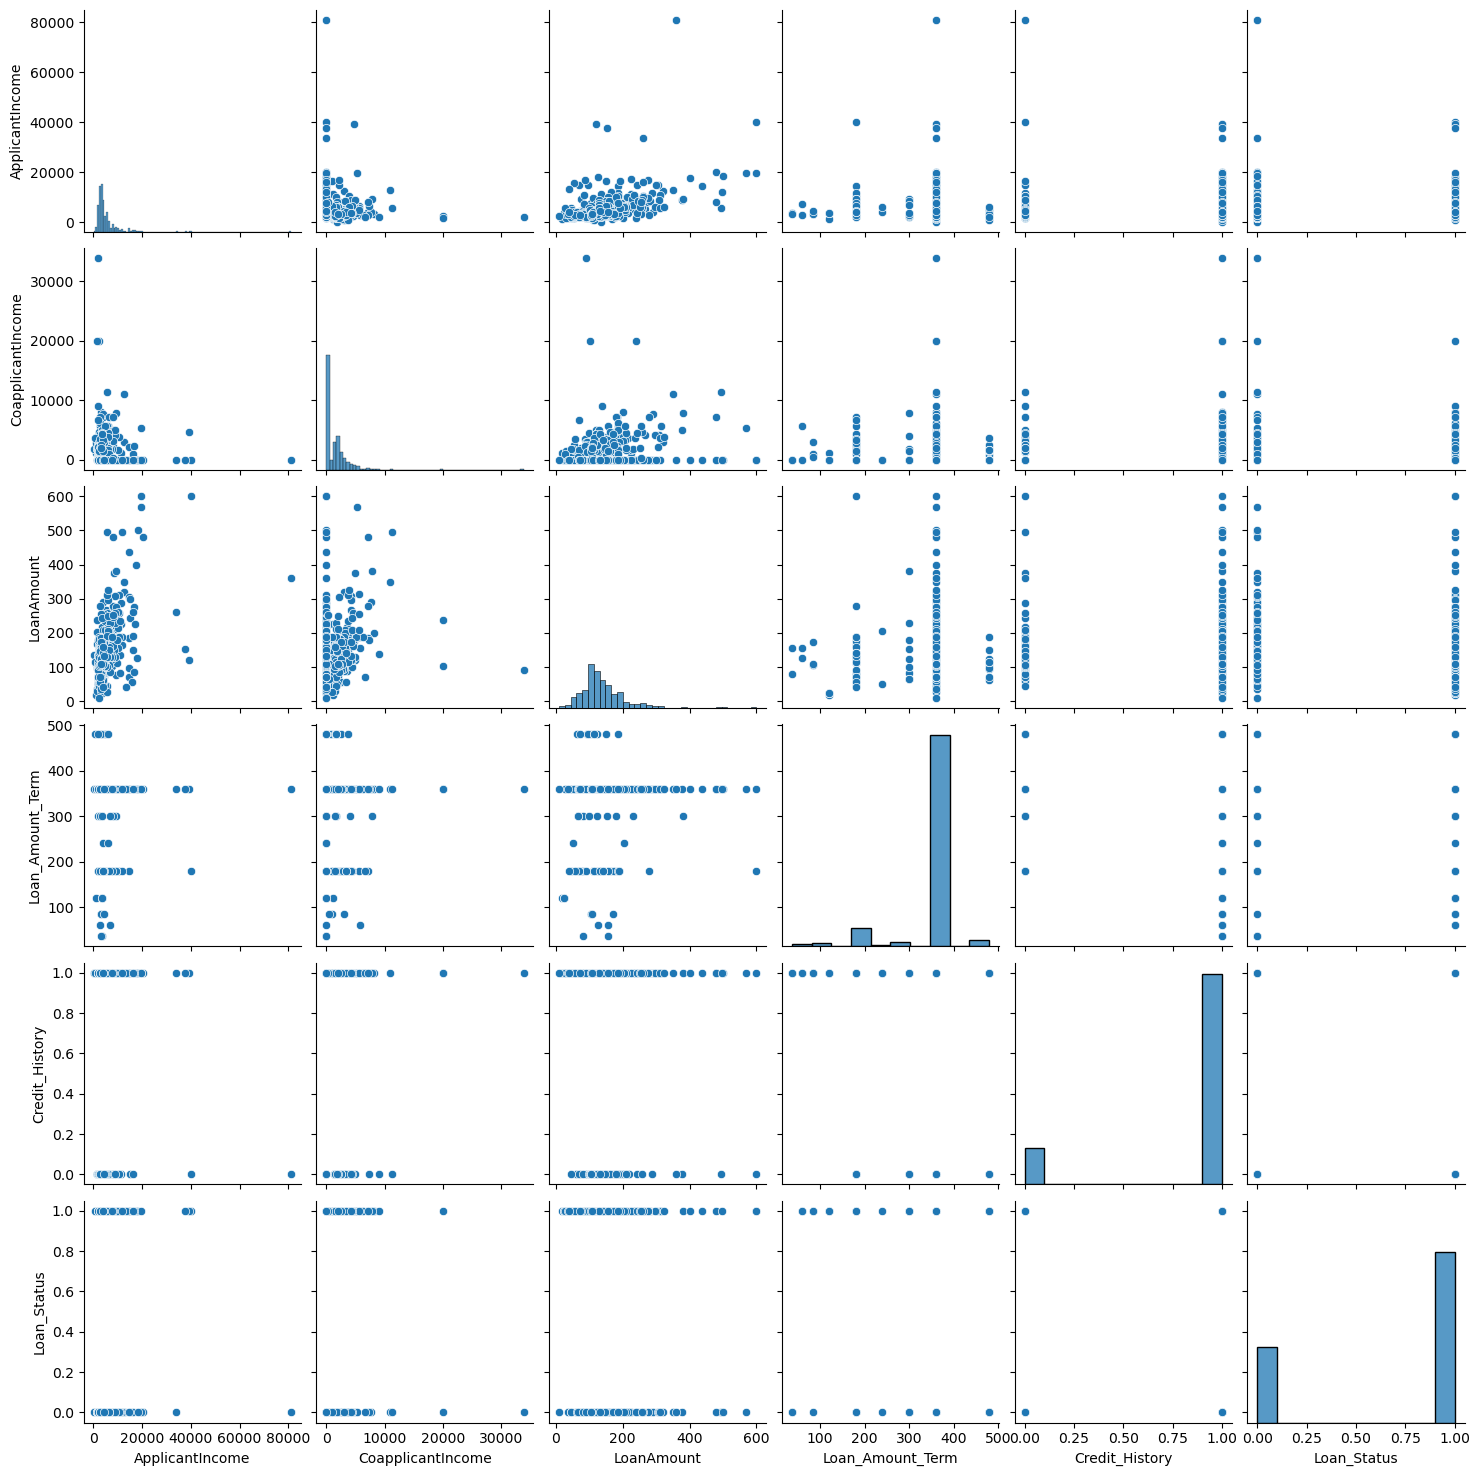

In [16]:
# Relationship between all numerical variables
sns.pairplot(dataset)

<AxesSubplot:xlabel='Education', ylabel='count'>

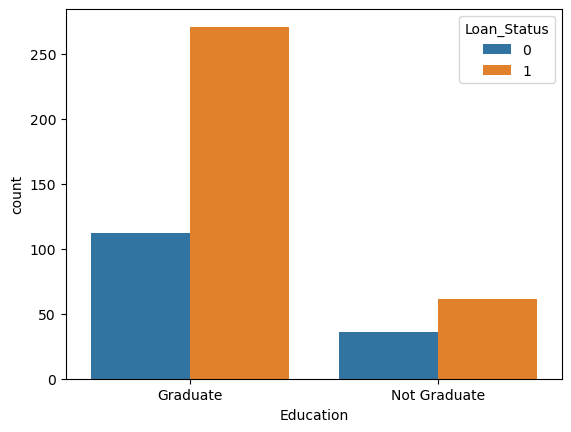

In [17]:
# Education & Loan Status
sns.countplot(x='Education', hue='Loan_Status', data=dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

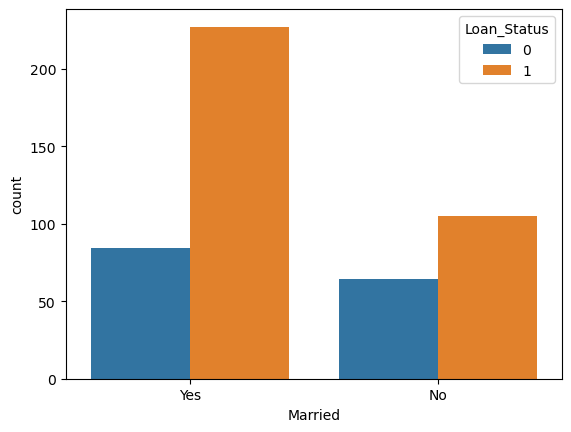

In [20]:
 # Marital Status & Loan Status
sns.countplot(x='Married', hue='Loan_Status', data = dataset)

In [23]:
# Converting categorical values to numerical values
dataset.replace({'Married':{'No':0, 'Yes':1},
                 'Gender':{'Male':1, 'Female':0},
                 'Self_Employed': {'No':0, 'Yes':1},
                 'Education':{'Graduate':1, 'Not Graduate':0},
                 'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_16284\1663942922.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Married':{'No':0, 'Yes':1},


In [24]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [25]:
# Separating data and Label
X=dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis = 1)
Y=dataset['Loan_Status'] 

In [26]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [27]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

# Splitting the dataset into training and testing data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [31]:
print(Y.shape, Y_train.shape, Y_test.shape)

(480,) (432,) (48,)


# Training the Model

In [32]:
classifier = svm.SVC(kernel='linear')

In [33]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# Model Evaluation

### Accuracy score on training data

In [34]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [36]:
print('Accuracy on training data : ', training_data_accuracy*100,'%')

Accuracy on training data :  79.86111111111111 %


### Accuracy score on testing data

In [37]:
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [38]:
print("Accuracy on testing data : ", testing_data_accuracy*100, '%')

Accuracy on testing data :  70.83333333333334 %


# Making a Predictive System

In [40]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [44]:
in_col = list(X.columns)
inv = []

for i in in_col:
    x = float(input(f"Enter the value of {i} : "))
    inv.append(x)

input_data = tuple(inv)


# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the array as we are predicting for one instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = classifier.predict(input_data_reshaped)
print("\n Pridicton : ", prediction)


if prediction[0] == 0:
    print("\n***The person is Not eligible for loan***")
else:
    print("\n***The person is eligible for loan***")

Enter the value of Gender : 1
Enter the value of Married : 1
Enter the value of Dependents : 1
Enter the value of Education : 1
Enter the value of Self_Employed : 0
Enter the value of ApplicantIncome : 4583
Enter the value of CoapplicantIncome : 1508.0
Enter the value of LoanAmount : 128.0
Enter the value of Loan_Amount_Term : 360.0
Enter the value of Credit_History : 1.0
Enter the value of Property_Area : 0

 Pridicton :  [1]

***The person is eligible for loan***


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
